In [ ]:
from engine import Value

In [2]:
# I've just copy/paste this function
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = left to right
    
    nodes, edges = trace(root)
    
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot


In [3]:
a = Value(3,label='a')
b = Value(4,label='b')

In [4]:
c = a + b

In [5]:
c.label = 'c'
c._op = '+'

In [6]:
c

Value(data=7)

In [7]:
a

Value(data=3)

In [8]:
a.grad

0.0

In [9]:
a*c

Value(data=21)

In [10]:
a**c

Value(data=2187)

In [11]:
a**(-1)

Value(data=0.3333333333333333)

In [19]:
c.backward()

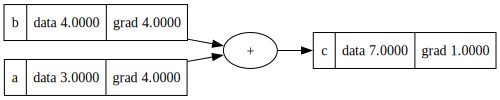

In [20]:
draw_dot(c)

In [21]:
d = c * a

In [25]:
d.backward()

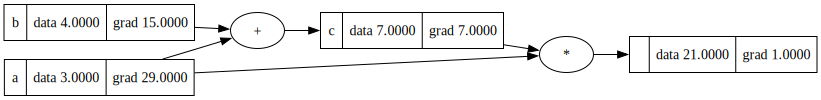

In [26]:
draw_dot(d)

In [27]:
f = Value.tanh(d)

In [33]:
f.backward()

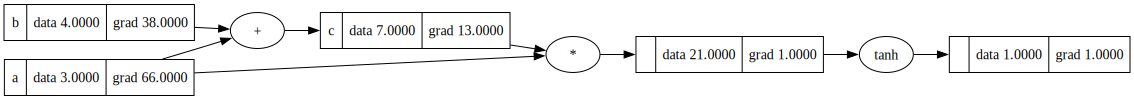

In [34]:
draw_dot(f)

In [39]:
g = Value.exp(f)

In [42]:
g.backward()

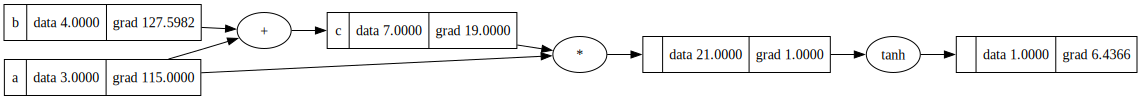

In [43]:
draw_dot(f)

In [44]:
from nnl import Neuron

In [45]:
neuron = Neuron(nin=3)  # Crée un neurone avec 3 entrées
inputs = [Value(0.5), Value(-1.2), Value(3.0)]  # Valeurs d'entrée
output = neuron(inputs)  # Calcule la sortie
print(output)  # Affiche la sortie

Value(data=0.6701197669907212)


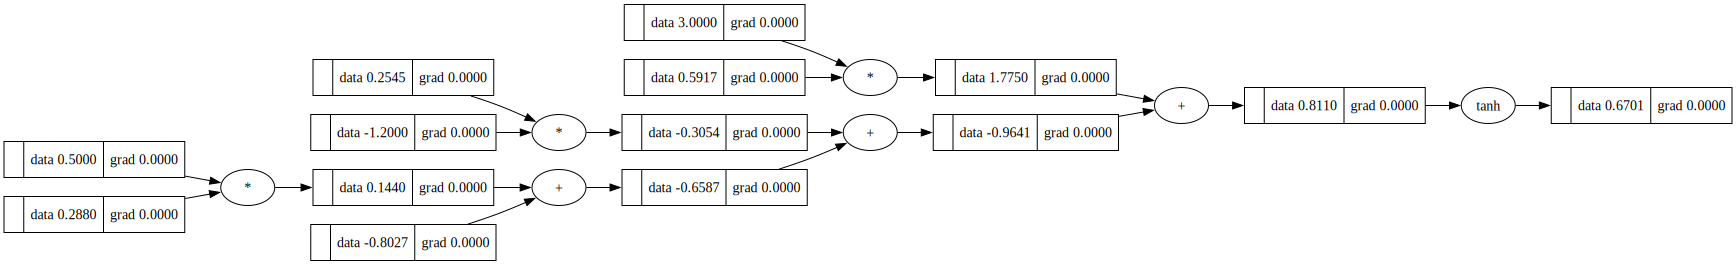

In [46]:
draw_dot(output)

In [47]:
output.backward()

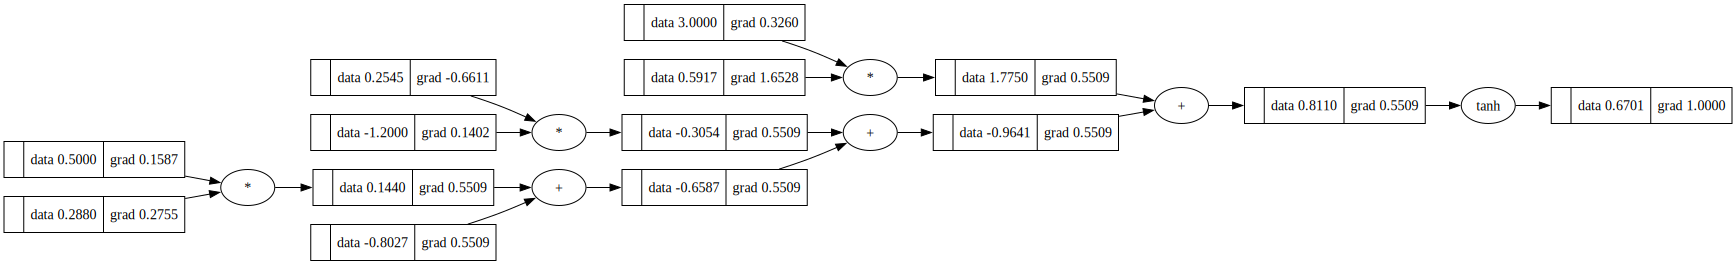

In [48]:
draw_dot(output)